<a href="https://colab.research.google.com/github/daniilomendes/Validade_alimentos_com_Fuzzy/blob/main/ValidadeAlimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etapas para o desenvolvimento fuzzy:
analise do Problema;
Definição das variaveis;
Definição das Funções de pertinencia;
Criação de Regioes.

Assim, segundo o problema apresentado, estamos desenvolvendo um sistema Fuzzy que modela a validade do produto com base na temperatura(T) e umidade Relativa(UR) do deposito. A T é um valor entre 0 e 40 C, a UR entre 0 e 100% e a Validade de 0 a 60 dias.


Variaveis de entrada:
Temperatura:

Universo(intervalo de valores):[0, 40]

Conjuntos Fuzzy/Funções de Pertinencia: Fria, Amena, Quente

Umidade Relativa:

Universo(intervalo de valores):[0, 100]

Conjuntos Fuzzy/Funções de Pertinencia: Baixa, Media, Alta
  
Variaveis de Saida:
Validade:

Universo(Intervalo de valores):[0, 60]

Conjuntos Fuzzy/Funções de Pertinencia: Curta, Aceitavel, Longa

In [ ]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 4.8 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=240621332b13d47230f72a0c63b5f4802dbc8ece0236efab363e976c0de46baa
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
#[2]Fuzzyficação
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

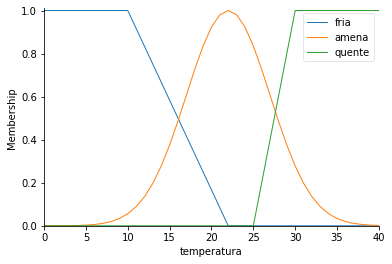

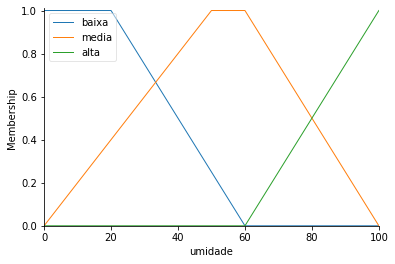

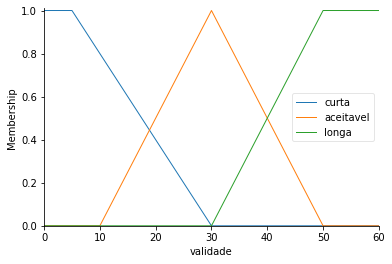

In [ ]:
#Criando as Variaveis do Problema:
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')
validade = ctrl.Consequent(np.arange(0, 61, 1), 'validade')

#criando as funções de pertinencia para a temperatura
temperatura['fria'] = fuzz.trapmf(temperatura.universe,[0,0,10,22])
temperatura['amena'] = fuzz.gaussmf(temperatura.universe,22,5)
temperatura['quente'] = fuzz.trapmf(temperatura.universe,[25,30,40,40])

#criando as funções de pertinencia para a umidade
umidade['baixa'] = fuzz.trapmf(umidade.universe,[0,0,20,60])
umidade['media'] = fuzz.trapmf(umidade.universe,[0,50,60,100])
umidade['alta'] = fuzz.trimf(umidade.universe,[60,100,100])

#criando as funções de pertinencia para a validade
validade['curta'] = fuzz.trapmf(validade.universe,[0,0,5,30])
validade['aceitavel'] = fuzz.trimf(validade.universe,[10,30,50])
validade['longa'] = fuzz.trapmf(validade.universe,[30,50,60,60])


#visualizando as funções de pertinencia para cada variavel
temperatura.view()
umidade.view()
validade.view()

Interferencias Fuzzy

#Etapa nas qual as proposições(regras) são definidar e examinadas paralelamente:

Definição das proposições;

Analise das regras;

Criação da região resultante.

#Definição das Proposições para o sistema Fuzzy de controle da validade
Base de Conhecimento/Regras:

Se a temperatura é fria e umidade é baixa ENTÃO a validade é longa;

Se a temperatura é quente ou umidade é alta ENTÃO a validade é curta;

Se a umidade é media ENTÃO a vaidade é aceitavel;

Defuzzificação.

In [ ]:
#Interferencia Fuzzy e defuzzificação
#base de conheciento/regras

rule1 = ctrl.Rule(temperatura['fria'] & umidade['baixa'], validade['longa'])
rule2 = ctrl.Rule(temperatura['quente'] | umidade['alta'], validade['curta'])
rule3 = ctrl.Rule(umidade['media'], validade['aceitavel'])

A validade é de 30 dias


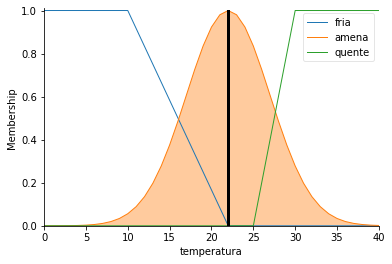

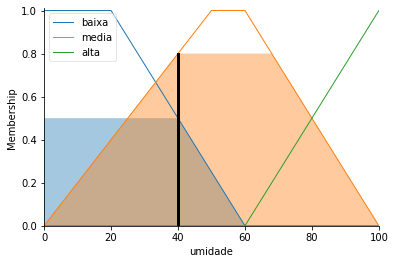

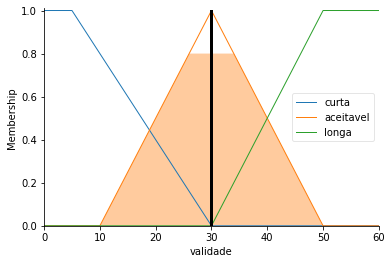

In [ ]:
#Sistema fuzzy e simulação
validade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)

#entrando com valores de entrada da temperatura e umidade
validade_simulador.input['temperatura'] = 22;
validade_simulador.input['umidade'] = 40;

#computando o resultado(interferencia Fuzzy + defuzzificação)
validade_simulador.compute()
print('A validade é de %d dias' %round(validade_simulador.output['validade']))

#visualizando as regiões
temperatura.view(sim = validade_simulador)
umidade.view(sim = validade_simulador)
validade.view(sim = validade_simulador)